#*Homework 3*

___



###*Let's begin downloading all libraries*

In [ ]:
!pip install -Uq rebound

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.9/744.9 kB 7.1 MB/s eta 0:00:00


###*Initialization of Rebound Simulation and addition of all planets*

In [ ]:
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import plotly.graph_objects as go
import pandas as pd

sim = rb.Simulation()
sim.units = 'au', 'msun', 'yr'

planets = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
planet_colors = ["#FFD700", "#CD853F", "#4169E1", "#6495ED", "#FF4500", "#FF6347", "#CD853F", "#4682B4", "#4169E1"]


for planet in planets:
  sim.add(planet , date = "2002-01-28 02:00:00")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


###*Solution of Two-body problem for graphing orbits*

###*Mercury, Venus and Earth*

In [ ]:
fig = go.Figure()

fig.update_layout(

    autosize = True,
    title = "Solar System (in AU)",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="blue",
    legend_title_font_color="green")

def ecuacion_2cuerpos(Y,t,mu):
  f = [0,0,0,0,0,0]
  f[0] = Y[3]
  f[1] = Y[4]
  f[2] = Y[5]
  r = (Y[0]**2 + Y[1]**2 + Y[2]**2)**0.5
  f[3] = -mu*Y[0]/r**3
  f[4] = -mu*Y[1]/r**3
  f[5] = -mu*Y[2]/r**3
  return f

ts = np.linspace(0,1,200) #years

for i in range(1,4):

  mu = sim.G*(sim.particles[0].m + sim.particles[i].m)

  r_sun = np.array([sim.particles[0].xyz[0],sim.particles[0].xyz[1],sim.particles[0].xyz[2]])
  v_sun = np.array([sim.particles[0].vxyz[0],sim.particles[0].vxyz[1],sim.particles[0].vxyz[2]])

  r_planet = np.array([sim.particles[i].xyz[0],sim.particles[i].xyz[1],sim.particles[i].xyz[2]])
  v_planet = np.array([sim.particles[i].vxyz[0],sim.particles[i].vxyz[1],sim.particles[i].vxyz[2]])

  #Vector r and r_dot

  rvec = r_sun - r_planet
  vvec = v_sun - v_planet

  Y0s = [rvec[0],rvec[1],rvec[2],vvec[0],vvec[1],vvec[2]]

  solucion = odeint(ecuacion_2cuerpos,Y0s,ts,args=(mu,))

  rs = solucion[:,:3]

  r2s = -sim.particles[0].m/(sim.particles[0].m+(sim.particles[i].m))*rs

  fig.add_traces(
    go.Scatter3d(
       x=r2s[:,0],y=r2s[:,1],z = r2s[:,2], name = planets[i],
       mode='lines',
       marker=dict(color=planet_colors[i])
    )
  )

fig.show()

###*Mars, Jupiter, Saturn, Uranus and Neptune*

In [ ]:
fig = go.Figure()

fig.update_layout(

    autosize = True,
    title = "Solar System (in AU)",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="blue",
    legend_title_font_color="green")

def ecuacion_2cuerpos(Y,t,mu):
  f = [0,0,0,0,0,0]
  f[0] = Y[3]
  f[1] = Y[4]
  f[2] = Y[5]
  r = (Y[0]**2 + Y[1]**2 + Y[2]**2)**0.5
  f[3] = -mu*Y[0]/r**3
  f[4] = -mu*Y[1]/r**3
  f[5] = -mu*Y[2]/r**3
  return f

ts = np.linspace(0,166,2000) #years

for i in range(4,len(planets)):

  mu = sim.G*(sim.particles[0].m + sim.particles[i].m)

  r_sun = np.array([sim.particles[0].xyz[0],sim.particles[0].xyz[1],sim.particles[0].xyz[2]])
  v_sun = np.array([sim.particles[0].vxyz[0],sim.particles[0].vxyz[1],sim.particles[0].vxyz[2]])

  r_planet = np.array([sim.particles[i].xyz[0],sim.particles[i].xyz[1],sim.particles[i].xyz[2]])
  v_planet = np.array([sim.particles[i].vxyz[0],sim.particles[i].vxyz[1],sim.particles[i].vxyz[2]])

  rvec = r_sun - r_planet
  vvec = v_sun - v_planet

  Y0s = [rvec[0],rvec[1],rvec[2],vvec[0],vvec[1],vvec[2]]

  solucion = odeint(ecuacion_2cuerpos,Y0s,ts,args=(mu,))

  rs = solucion[:,:3]

  r2s = -sim.particles[0].m/(sim.particles[0].m+(sim.particles[i].m))*rs

  fig.add_traces(
    go.Scatter3d(
       x=r2s[:,0],y=r2s[:,1],z = r2s[:,2], name = planets[i],
       mode='lines',
       marker=dict(color=planet_colors[i])
    )
  )

fig.show()

###*Calculation of Orbital Eccentricity, ERE, MARE, Laplace Vector, radial velocity and angular velocity*


###*The units of the table are in  AU, $M_⊙$ and years*


In [ ]:
e= [] #eccentricity

hs = [] #MARE

epsilon = []  #ERE

v_rad = []  #radial velocity

v_the = [] #angular velocity

es = [] #Laplace vector

for i in range(1,len(planets)):

  mu = sim.G*(sim.particles[0].m + sim.particles[i].m)

  r_sun = np.array([sim.particles[0].xyz[0],sim.particles[0].xyz[1],sim.particles[0].xyz[2]])
  v_sun = np.array([sim.particles[0].vxyz[0],sim.particles[0].vxyz[1],sim.particles[0].vxyz[2]])

  r_planet = np.array([sim.particles[i].xyz[0],sim.particles[i].xyz[1],sim.particles[i].xyz[2]])
  v_planet = np.array([sim.particles[i].vxyz[0],sim.particles[i].vxyz[1],sim.particles[i].vxyz[2]])

  rvec = r_sun - r_planet
  vvec = v_sun - v_planet

  Y0s = [rvec[0],rvec[1],rvec[2],vvec[0],vvec[1],vvec[2]]

  solucion = odeint(ecuacion_2cuerpos,Y0s,ts,args=(mu,)) #Solver

  rs = solucion[0,:3]

  v_rad.append(np.linalg.norm(vvec))

  r2s = -sim.particles[0].m/(sim.particles[0].m+(sim.particles[i].m))*rs

  hvec = np.cross(rvec, vvec)

  hs.append(np.linalg.norm( hvec))

  epsilon.append(1/2*(vvec@vvec) - mu/(rvec@rvec)**0.5)

  e.append( np.sqrt(1 + 2*epsilon[-1]*(hvec@hvec)/mu**2))

  v_the.append(hs[-1]/(rvec@rvec))

  es.append(np.cross(vvec,hvec)/mu - rvec/np.linalg.norm(rvec))


es_write = [ "({:.4f},{:.4f},{:.4f})".format(i[0],i[1],i[2]) for i in es]


# Create a dictionary with data for each column
data = {
    'Excentricidad orbital': e,
    'Energía relativa específica (ERE)': epsilon,
    'Magnitud del MARE.': hs,
    'Componentes del vector de Laplace': es_write,
    'Velocidad radial.': v_rad,
    'Velocidad angular.': v_the,

}

# Create the DataFrame
df = pd.DataFrame(data, index= planets[1:])

# Transpose the DataFrame to have planets as rows and attributes as columns
df = df.transpose()

# Display the DataFrame
df

,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune
Excentricidad orbital,0.205643,0.0068,0.01669,0.093347,0.048906,0.05766,0.048259,0.010957
Energía relativa específica (ERE),-50.990879,-27.288309,-19.738577,-12.954597,-3.797153,-2.059733,-1.030605,-0.658757
Magnitud del MARE.,3.825599,5.343564,6.282193,7.721756,14.321672,19.423336,27.465968,34.39236
Componentes del vector de Laplace,"(-0.0452,-0.2002,-0.0122)","(0.0045,-0.0051,-0.0003)","(0.0037,-0.0163,0.0000)","(-0.0852,0.0380,0.0029)","(-0.0472,-0.0127,0.0011)","(0.0024,-0.0576,0.0009)","(0.0473,-0.0095,-0.0006)","(-0.0051,-0.0097,0.0003)"
Velocidad radial.,11.747294,7.337659,6.379127,5.324764,2.767612,2.144254,1.374271,1.142852
Velocidad angular.,35.343139,10.075902,6.477243,3.647251,0.533562,0.236642,0.068733,0.037973


#*Illustrating Laplace vectors in 3D is not convenience because of the small relative size of the vectors respect to their orbits. Let's do it in a 2D plot*

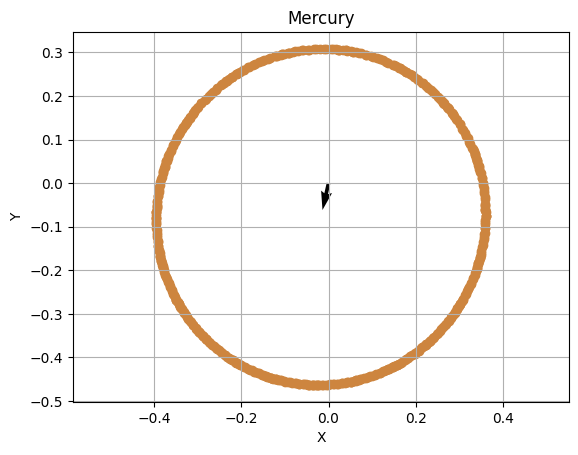

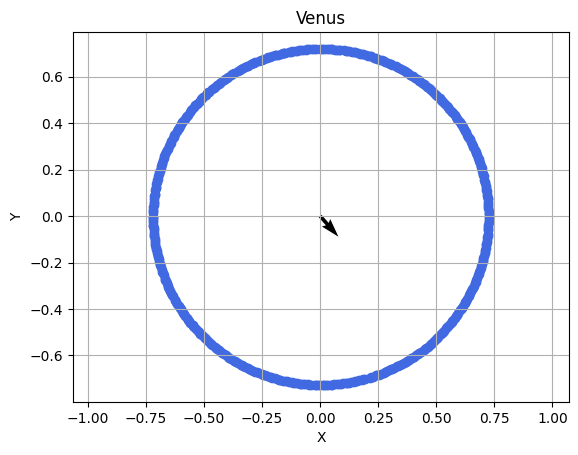

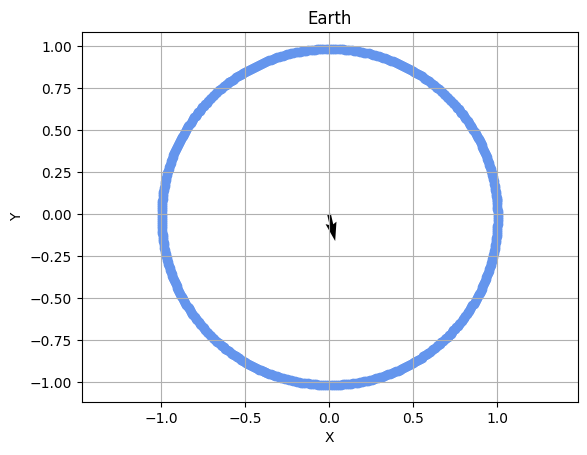

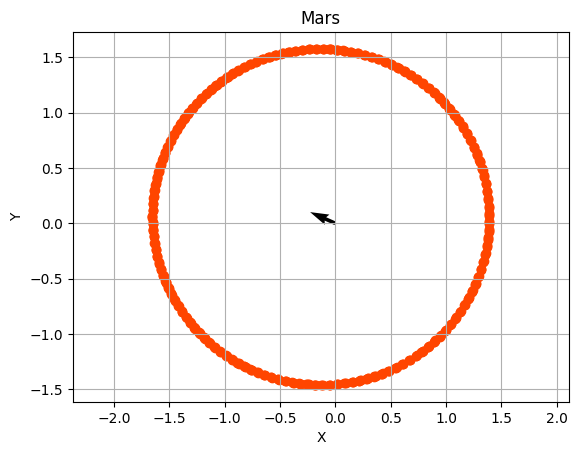

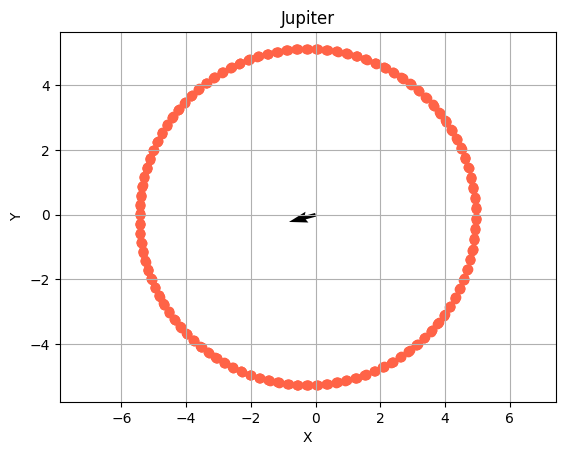

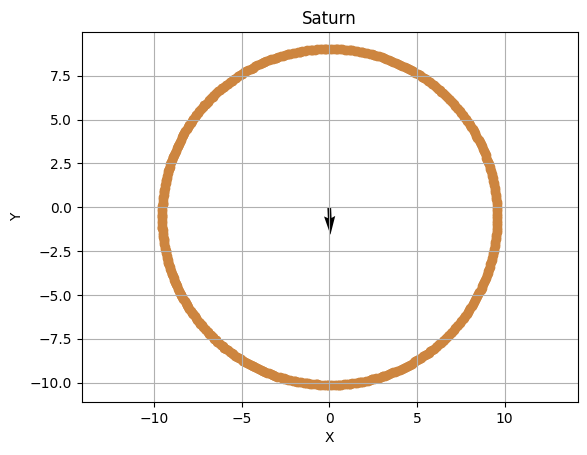

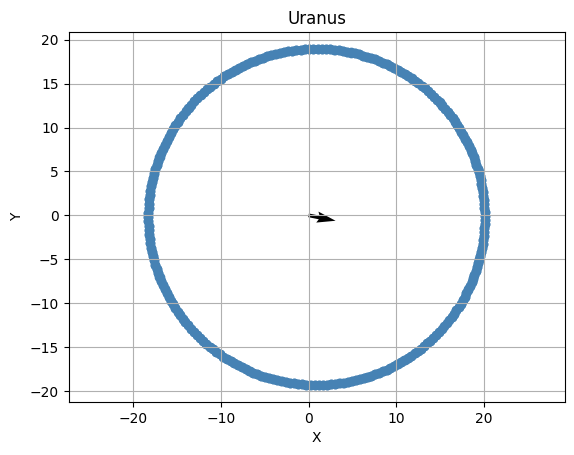

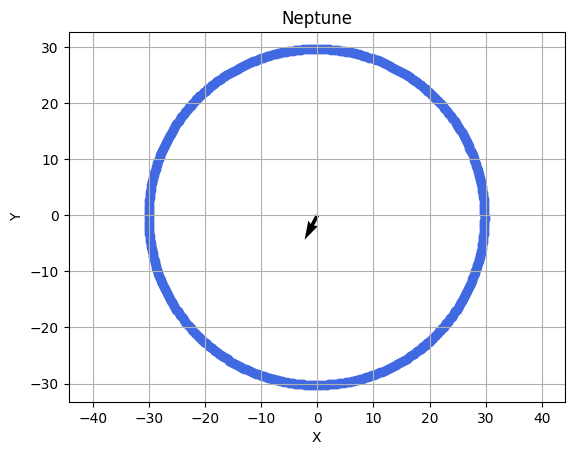

In [ ]:
for i in range(1,len(planets)):

  mu = sim.G*(sim.particles[0].m + sim.particles[i].m)

  ts = np.linspace(0,166,500) #years

  r_sun = np.array([sim.particles[0].xyz[0],sim.particles[0].xyz[1],sim.particles[0].xyz[2]])
  v_sun = np.array([sim.particles[0].vxyz[0],sim.particles[0].vxyz[1],sim.particles[0].vxyz[2]])

  r_planet = np.array([sim.particles[i].xyz[0],sim.particles[i].xyz[1],sim.particles[i].xyz[2]])
  v_planet = np.array([sim.particles[i].vxyz[0],sim.particles[i].vxyz[1],sim.particles[i].vxyz[2]])

  rvec = r_sun - r_planet
  vvec = v_sun - v_planet

  Y0s = [rvec[0],rvec[1],rvec[2],vvec[0],vvec[1],vvec[2]]

  solucion = odeint(ecuacion_2cuerpos,Y0s,ts,args=(mu,))

  rs = solucion[:,:3]

  r2s = -sim.particles[0].m/(sim.particles[0].m+(sim.particles[i].m))*rs


  plt.scatter(r2s[:, 0], r2s[:, 1], color=planet_colors[i])

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.axis('equal')
  plt.title('{}'.format(planets[i]))
  #plt.legend()
  plt.quiver(0,0,es[i-1][0],es[i-1][1])


  plt.grid(True)
  plt.show()
